<a href="https://colab.research.google.com/github/Verollaf/CalendarView/blob/master/ML_Verolla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Esame ML Verolla
Inizio con l'import delle librerie standard che mi serviranno in tutto il COLAB

In [ ]:
import matplotlib.pyplot as plt  # Matplotlib, per la visualizzazione dei risultati
import matplotlib  # Import del package principale, contenente costanti utili
import numpy as np  # Numpy

## Download del dataset


Come prima cosa scarico il dataset Optical recognition of handwritten digits dataset


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

## Studio del dataset
 In questa sezione farò dei test sul dataset per capire da cosa è composto e come utilizzarlo

Il dataset è composto da 1797 elementi.
I target del dataset sono:  [0 1 2 3 4 5 6 7 8 9]


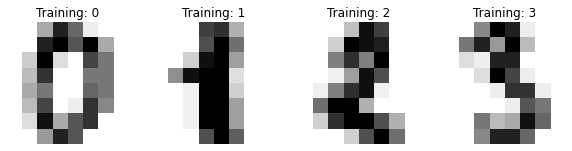

In [ ]:
s = digits.target.size
print('Il dataset è composto da', str(s) ,'elementi.')
print('I target del dataset sono: ', str(digits.target_names))
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Preparazione dei dati
In questa sezione preparo i dati per effettuare le classificazioni che vedremo dopo. Inizio con l'importare le librerie che sevono per lo ***split*** del dataset in test set e training tet e le librerie per il calcolo delle ***metriche***.

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

Successivamente, preparo i dati per l'addestramento dichiarando un array di dati NumPy e facendone un reshape in modo che abbia la prima dimensione uguale alla lunghezza delle immagini, che è il numero di campioni, n_samples, ma con dimensionalità ridotta. Quindi la dimensione dei dati sarà 1797 x 64.

La fase di reshape è stata fatta studiando la documentazione del dataset al seguente [link](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)



In [ ]:
n_samples = len(digits.images)
print(digits.images.shape)
data = digits.images.reshape((n_samples, -1))
print(data.shape)

(1797, 8, 8)
(1797, 64)


##Split dei dati
A questo punto splitto i dati.




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, shuffle=True)

# Classificazione tramite Bayes (NAIVE)

Di seguito sara riportato la classificazione tramite l'utilizzo del classificatore bayesiano.
Verranno utilizzati vari modelli basati du differenti distribuzioni di probabilità

Importo dalla libreria sklearn i metodi che mi servono per la classificazione

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB

## Classificatore Bayesiano Gaussiano
Per la classificazione bayesiana, verrà utilizzata la classificazione tramite la Gaussiana quindi supponendo che i valori di ciascuna caratteristica siano normalmente distribuiti (ossia ricadono da qualche parte su una curva a campana)


Classification report for classifier GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.80      0.78      0.79        51
           2       1.00      0.49      0.66        59
           3       0.93      0.79      0.85        63
           4       0.98      0.80      0.88        56
           5       0.92      0.87      0.89        52
           6       0.81      0.96      0.88        48
           7       0.73      0.98      0.84        52
           8       0.53      0.91      0.67        58
           9       0.93      0.57      0.70        44

    accuracy                           0.82       540
   macro avg       0.86      0.82      0.82       540
weighted avg       0.86      0.82      0.82       540



Loss GaussianNB(priors=None, var_smoothing=1e-09):
3.789688199955022


Confusion matrix:
[[57  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  2  2  5  2]


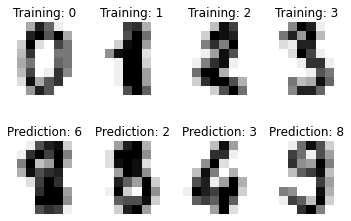

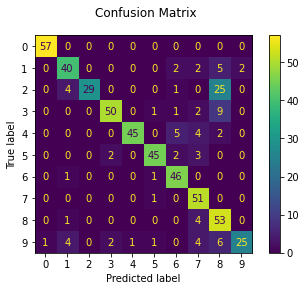

In [ ]:
gaussian_clf = GaussianNB()
gaussian_clf.fit(X_train, y_train)

gaussian_predicted = gaussian_clf.predict(X_test)
gaussian_predict_proba = gaussian_clf.predict_proba(X_test)
_, axes = plt.subplots(2, 4)

images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions = list(zip(digits.images[n_samples // 2:], gaussian_predicted))

for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("\nClassification report for classifier %s:\n%s\n" % (gaussian_clf, metrics.classification_report(y_test, gaussian_predicted)))
print("\nLoss %s:\n%s\n" % (gaussian_clf, metrics.log_loss(y_test, gaussian_predict_proba)))
disp = metrics.plot_confusion_matrix(gaussian_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", gaussian_clf.score(X_test, y_test))
plt.show()

## Classificatore Bayesiano Multinomiale
I vettori caratteristica rappresentano le frequenze con cui determinati eventi sono stati generati da una distribuzione multinomiale. Questo è il modello di evento utilizzato in genere per la classificazione dei documenti.


Classification report for classifier MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        57
           1       0.83      0.76      0.80        51
           2       0.94      0.86      0.90        59
           3       1.00      0.86      0.92        63
           4       0.96      0.93      0.95        56
           5       0.96      0.83      0.89        52
           6       0.96      0.96      0.96        48
           7       0.84      1.00      0.91        52
           8       0.78      0.91      0.84        58
           9       0.74      0.84      0.79        44

    accuracy                           0.90       540
   macro avg       0.90      0.90      0.89       540
weighted avg       0.90      0.90      0.90       540



Loss MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True):
2.096324407946659


Confusion matrix:
[[57  0  0  0  0  0  0  0  0  0]
 [ 0 

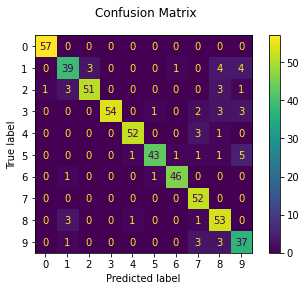

In [ ]:
multinomial_clf = MultinomialNB()
multinomial_clf.fit(X_train, y_train)

multinomial_predicted = multinomial_clf.predict(X_test)
multinomial_predict_proba = multinomial_clf.predict_proba(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (multinomial_clf, metrics.classification_report(y_test, multinomial_predicted)))
print("\nLoss %s:\n%s\n" % (multinomial_clf, metrics.log_loss(y_test, multinomial_predict_proba)))
disp = metrics.plot_confusion_matrix(multinomial_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", multinomial_clf.score(X_test, y_test))
plt.show()

## Classificatore Bayesiano di *Bernoulli*
Nel modello di eventi multivariato di Bernoulli, le caratteristiche indipendenti che descrivono gli input sono variabili booleane (variabili binarie del tipo Vero o Falso).


Classification report for classifier BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.71      0.59      0.65        51
           2       0.89      0.83      0.86        59
           3       0.91      0.84      0.88        63
           4       0.91      0.93      0.92        56
           5       0.93      0.81      0.87        52
           6       0.96      0.96      0.96        48
           7       0.84      0.98      0.90        52
           8       0.69      0.79      0.74        58
           9       0.66      0.75      0.70        44

    accuracy                           0.85       540
   macro avg       0.85      0.85      0.85       540
weighted avg       0.85      0.85      0.85       540



Loss BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True):
0.7287436225253892


Confusion matrix:
[[57  0  0  0

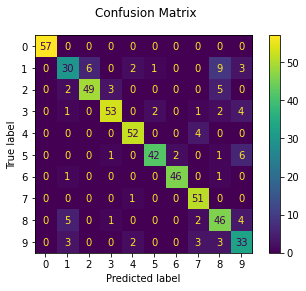

In [ ]:
bernoulli_clf = BernoulliNB()
bernoulli_clf.fit(X_train, y_train)

bernoulli_predicted = bernoulli_clf.predict(X_test)
bernoulli_predict_proba = bernoulli_clf.predict_proba(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (bernoulli_clf, metrics.classification_report(y_test, bernoulli_predicted)))
print("\nLoss %s:\n%s\n" % (bernoulli_clf, metrics.log_loss(y_test, bernoulli_predict_proba)))
disp = metrics.plot_confusion_matrix(bernoulli_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", bernoulli_clf.score(X_test, y_test))
plt.show()


Classification report for classifier ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.76      0.69      0.72        51
           2       0.77      0.93      0.85        59
           3       0.94      0.81      0.87        63
           4       0.85      0.93      0.89        56
           5       0.89      0.81      0.85        52
           6       0.77      0.98      0.86        48
           7       0.60      0.98      0.74        52
           8       1.00      0.22      0.37        58
           9       0.73      0.75      0.74        44

    accuracy                           0.81       540
   macro avg       0.83      0.81      0.79       540
weighted avg       0.84      0.81      0.79       540



Loss ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False):
0.7106886200310506


Confusion matrix:
[[57  0  0  0  

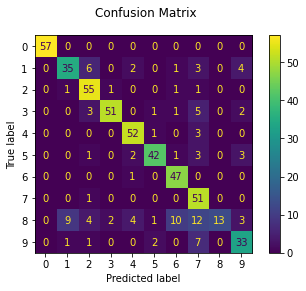

In [ ]:
complement_clf = ComplementNB()
complement_clf.fit(X_train, y_train)

complement_predicted = complement_clf.predict(X_test)
complement_predict_proba = complement_clf.predict_proba(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (complement_clf, metrics.classification_report(y_test, complement_predicted)))
print("\nLoss %s:\n%s\n" % (complement_clf, metrics.log_loss(y_test, complement_predict_proba)))
disp = metrics.plot_confusion_matrix(complement_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", complement_clf.score(X_test, y_test))
plt.show()

#Random Forest
Di seguito saranno riportate le classificazioni ottenute sullo stesso dataset visto in precedenza utilizzando stavolta un algoritmo di tipo Random-Forest utilizzando dapprima la metrica *Gini* poi utilizzando la metrica *Entropy*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

##Metodi di supporto

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

## Metrica Gini


Classification report for classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       0.96      1.00      0.98        51
           2       1.00      1.00      1.00        59
           3       0.98      0.95      0.97        63
           4       0.98      0.96      0.97        56
           5       0.96      0.92      0.94        52
           6       0.98      0.98      0

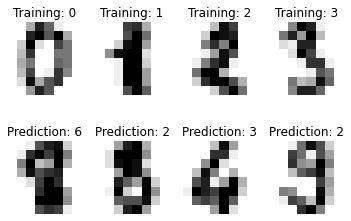

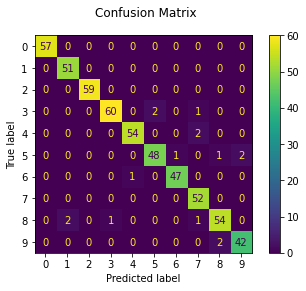

In [ ]:
gini_rf_clf = RandomForestClassifier(max_depth=10, random_state=0)
gini_rf_clf.fit(X_train, y_train)

predicted_rf_clf = gini_rf_clf.predict(X_test)

_, axes = plt.subplots(2, 4)
images_and_labels_rf = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels_rf[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
    
images_and_predictions_rf = list(zip(digits.images[n_samples // 2:], predicted_rf_clf))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions_rf[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
print("\nClassification report for classifier %s:\n%s\n" % (gini_rf_clf, metrics.classification_report(y_test, predicted_rf_clf)))
disp = metrics.plot_confusion_matrix(gini_rf_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", gini_rf_clf.score(X_test, y_test))
plt.show()


##Metrica Entropia

In [ ]:
entropy_rf_clf = RandomForestClassifier(max_depth=2, random_state=0, criterion= 'entropy',n_estimators= 150)
entropy_rf_clf.fit(X_train, y_train)

predicted_rf_entropy_clf = entropy_rf_clf.predict(X_test)

print("\nClassification report for classifier %s:\n%s\n" % (entropy_rf_clf, metrics.classification_report(y_test, predicted_rf_entropy_clf)))
disp = metrics.plot_confusion_matrix(entropy_rf_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("\nConfusion matrix:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Algorithm: ", entropy_rf_clf.score(X_test, y_test))
plt.show()